# Data Set 
---
Pima Indians Diabetes Database | Kaggle  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  

X_train: 기출문제, y_train: 기출문제 정답, X_test: 실전문제, y_test: 실전문제 정답(예측해야하는 값)  

fit: 주어진 기출문제와 정답으로 공부하는 과정(모의고사와 모의고사 답지); 학습 데이터로 모델 학습  
predict: 기출문제와 정답을 공부한 것을 바탕으로 실전문제(X_test)를 풀어봄 ; 학습 모델 통해 테스트 데이터의 레이블 값 예측  
Evaluation(score, metric): 제대로 문제를 풀었는지 채점 ; 예측된 레이블 값과 실제 레이블 값 예측 정확도 평가 

# 사용 라이브러리 
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Set Load
---

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")

# EDA
---

In [3]:
df.shape

(768, 9)

In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
265,5,96,74,18,67,33.6,0.997,43,0
687,1,107,50,19,0,28.3,0.181,29,0
553,1,88,62,24,44,29.9,0.422,23,0
315,2,112,68,22,94,34.1,0.315,26,0
227,3,162,52,38,0,37.2,0.652,24,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


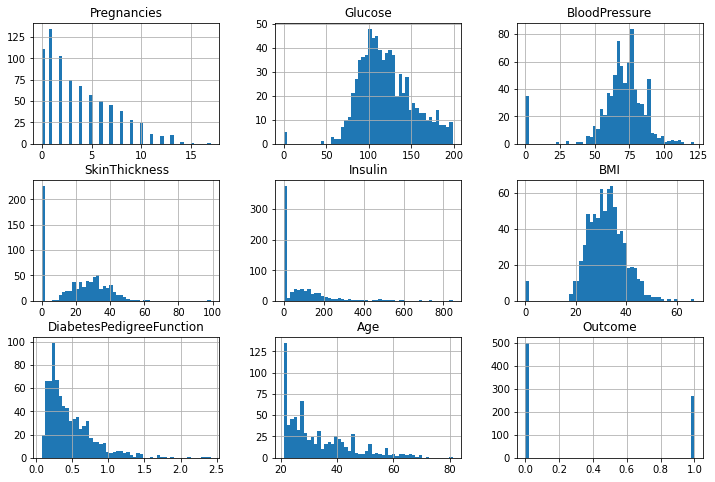

In [6]:
_ = df.hist(figsize=(12, 8), bins=50)

이상치 확인 "Glucose","BloodPressure","SkinThickness","Insulin","BMI"

In [7]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 학습, 예측데이터셋 나누기 
---

In [12]:
# 기출문제와 실전문제를 8:2로 나눠줌
split_count = int(df.shape[0]*0.8)
train, test = df[:split_count], df[split_count:]
print(f"train: {train.shape}\ntest: {test.shape}")

train: (614, 9)
test: (154, 9)


# 정답값이자 예측해야될 값

In [23]:
label_name = "Outcome" #Outcome은 정답이므로 학습, 예측에서 제외

# 학습, 예측에 사용할 칼럼

In [31]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옴
feature_names = df.columns.tolist()
feature_names.remove(label_name)

# 학습, 예측 데이터셋 만들기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [32]:
X_train, y_train, X_test, y_test = train[feature_names], train[label_name], test[feature_names], test[label_name]
print(f"X_train: {X_train.shape}\ny_train: {y_test.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (614, 8)
y_train: (154,)
X_test: (154, 8)
y_test: (154,)


# 머신러닝 알고리즘 

## 결정 트리 학습법 (Decision Tree Learning)
* 직관적으로 이해하기 쉬운 알고리즘 
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦 
* 규칙 노드: 규칙 조건
* 리프 노드: 결정된 클래스 값
* 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
* 트리를 어떻게 분할(Split)할 것인가가 중요
* 특별한 경우를 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
* 단점: 과적합(overfitting)으로 정확도가 떨어짐. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝이 필요함


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```


* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=15, 
                               max_features=0.9, 
                               random_state=42)
model

DecisionTreeClassifier(max_depth=15, max_features=0.9, random_state=42)

# 학습(훈련)

In [35]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_features=0.9, random_state=42)

# 예측

In [36]:
y_predict = model.predict(X_test)
y_predict[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

# 트리 알고리즘 분석

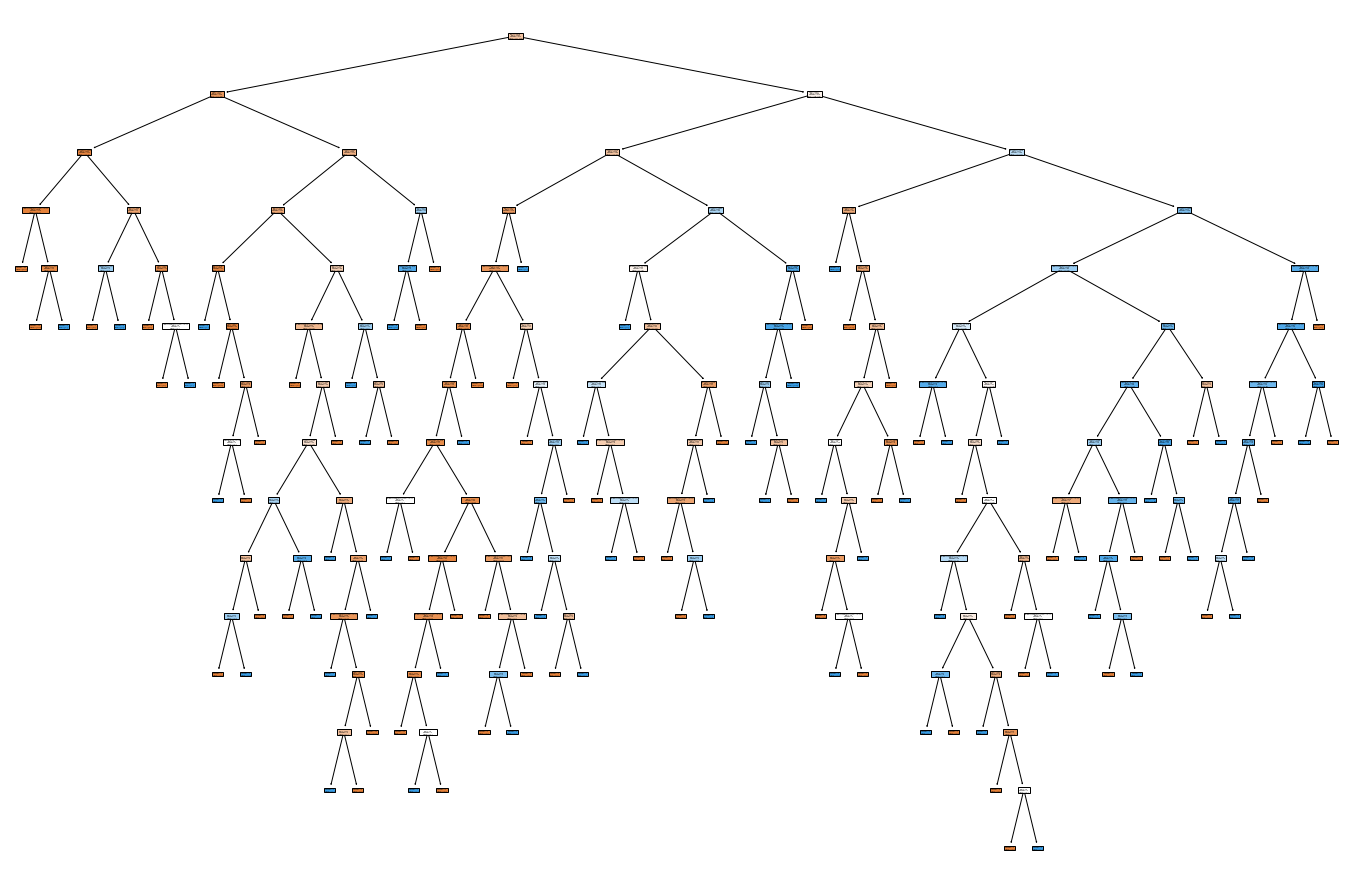

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 16))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

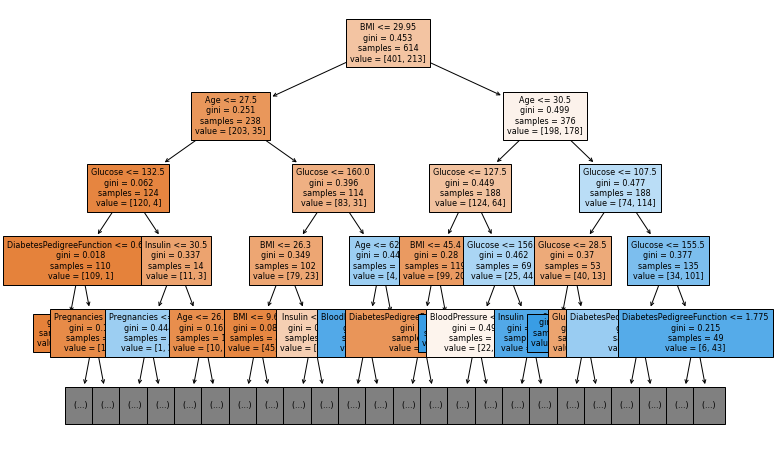

In [41]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_names, fontsize=8, max_depth=4)
plt.show()

결정트리 최상단에 가장 중요한 feature가 오는데 Glucose가 온 것을 확인할 수 있음

# feature의 중요도 추출

In [42]:
np.sum(model.feature_importances_)
model.feature_importances_

array([0.06755027, 0.27450567, 0.07485651, 0.02499499, 0.05034387,
       0.21695448, 0.1386182 , 0.15217601])

<AxesSubplot:>

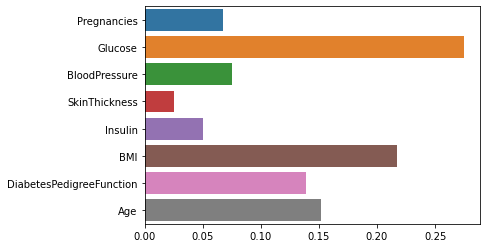

In [43]:
sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도(Accuracy) 측정하기

In [49]:
#예측의 정확도를 구함
(y_test == y_predict).mean()


0.7207792207792207

In [51]:
#위와 같은 방법처럼 구할 수 있지만 이미 구현된 알고리즘(sklearn의 내장함수)을 사용할 수도 있음
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7207792207792207

In [50]:
# model 의 score (sklearn의 내장함수)로 점수를 계산합니다.
model.score(X_test, y_test)

0.7207792207792207